# Building a prediction model using feature engineered columns and Logistic Regression (more interpretability)

This model is the ideal version as it would bring more interpretability to the predictive power of our features.

## Imports - Logistic Regression, TTS, StandardScaler, Classification Report, Confusion Matrix, Accuracy Score

In [71]:
# import manual_run_prem
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/thomasdoherty/Desktop/football-project/football-project-mvp/manual_run_prem.csv')

In [72]:
df

,rating_diff,net_goals_diff,p(Home),p(Draw),p(Away),Result
0,6.8,1.36,0.457,0.258,0.285,0
1,5.4,1.20,0.457,0.258,0.285,1
2,-6.3,-0.99,0.457,0.258,0.285,-1
3,4.1,0.42,0.457,0.258,0.285,1
4,6.6,-1.40,0.457,0.258,0.285,1
...,...,...,...,...,...,...
3035,-2.7,-0.06,0.457,0.258,0.285,0
3036,-1.3,0.14,0.457,0.258,0.285,-1
3037,0.2,-0.24,0.457,0.258,0.285,0
3038,-6.1,-1.10,0.457,0.258,0.285,-1


## Small preprocessing step - scaling of rating_diff and net_goals diff.

These were feature engineered at the last portion of the first workbook. 

**We will leave the prior probabilities UNSCALED at this time** because:
- They are already in a comparable range
- The original form enhances their interpretability

In [73]:
from sklearn.preprocessing import StandardScaler

# Scale only the non-probability features in manual_run_prem
scaler = StandardScaler()
features_to_scale = ['rating_diff', 'net_goals_diff']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

## Logistic Regression 

In [74]:
# split into X and y
X = df.drop('Result', axis=1)
y = df['Result']

In [75]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X.sample(5)

,rating_diff,net_goals_diff,p(Home),p(Draw),p(Away)
2610,-0.328763,-1.456185,0.457,0.258,0.285
1495,2.290829,1.863917,0.457,0.258,0.285
1244,0.695658,1.747422,0.457,0.258,0.285
578,-0.226321,0.396082,0.457,0.258,0.285
983,1.442022,1.199896,0.457,0.258,0.285


In [81]:
# train the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [78]:
# Evaluate the model
y_pred = logistic_model.predict(X_test)
print("Manual Run Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Manual Run Logistic Regression:
Accuracy: 0.5197368421052632
              precision    recall  f1-score   support

          -1       0.49      0.51      0.50       177
           0       0.00      0.00      0.00       152
           1       0.53      0.81      0.64       279

    accuracy                           0.52       608
   macro avg       0.34      0.44      0.38       608
weighted avg       0.39      0.52      0.44       608



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


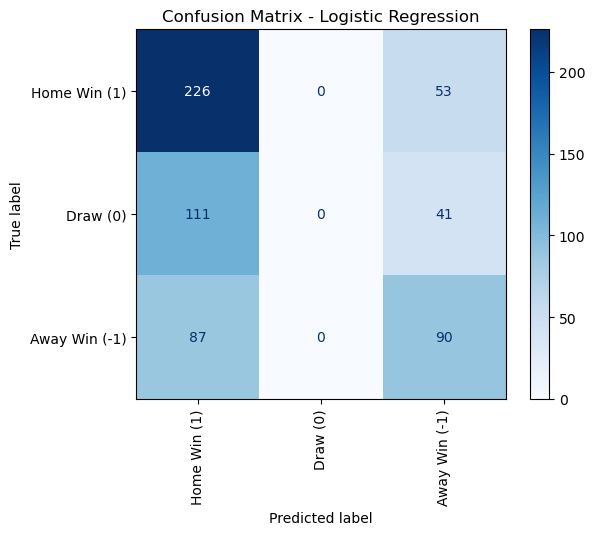

In [79]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Home Win (1)', 'Draw (0)', 'Away Win (-1)'])

# Plot the confusion matrix
disp.plot(cmap='Blues', xticks_rotation='vertical')
disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()

In [80]:
# print the results of the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[226   0  53]
 [111   0  41]
 [ 87   0  90]]
